In [39]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
# Import the time function
from time import time
# Functions that convert from bytes to numbers
import struct

# Generating random numbers: Some (hopefully) illustrative examples

How do we generate random numbers on the computer, which is fundamentally a deterministic machine?

## Historic Lotto numbers (1986 - 2016)

<BarContainer object of 34 artists>

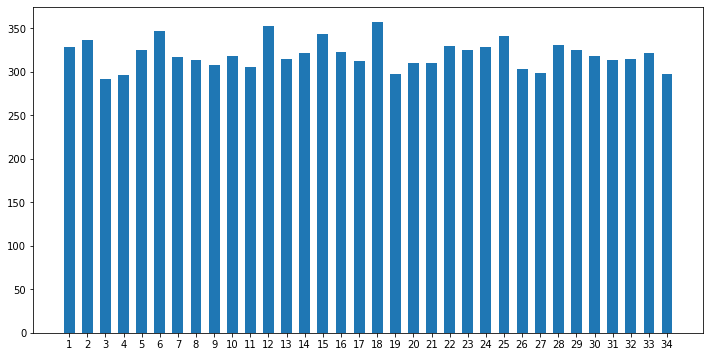

In [4]:
# Data taken from https://www.norsk-tipping.no/miscellaneous/getNumberStatisticsLotto.htm
# These are (presumably) true, random numbers, generated
# by a complicated physical contraption.
number = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34])
counts = np.array([328,336,292,296,325,347,317,314,308,318,306,353,315,322,343,323,312,357,298,310,310,330,325,329,341,303,299,331,325,318,313,315,322,297])

fig = plt.figure(figsize = (12, 6))
plt.xticks(number, number)
plt.bar(number, counts, width = 0.6)

## Hardware random number generator

In [24]:
# Measure the timing of some unpredictable physical event
# for example radioactivity using a Geiger counter, then
# use the last digits of the timestamp as a source of
# random numbers.

# Time returns number of seconds since 1. 1. 1970 (unix time) with six decimals
# Multiply by 1000000 and take the result modulo 100 to keep last two digits.
# If the time between events is both unpredictable, and much longer than 100 microseconds
# then these are essentially random numbers.
r = int(1e6*time() % 100)
print(r)

25


## /dev/random

On linux or Mac, there is a file-like object in the file system, at ``/dev/random`` which 

## Pseudo-random number generators (PRNG or sometimes just RNG)

The basic idea is to have a mathematical expression, that gives you a new number at each iteration.

### Example: Lehmer generator

https://en.wikipedia.org/wiki/Lehmer_random_number_generator

$$ X_{n+1} = a X_n \mod m $$

If $m$ is a large prime, and $a$ is a reasonably large number with some specific properties relative to $m$ (it's a primitive root modulo $m$), then the sequence of numbers generated from this scheme will be "pseudo-random". This means they will appear random, to someone who doesn't know how they are generated.

By construction, the largest number we can get from this generator is $m-1$, so if we divide the output by $m$, we will get numbers on the half-open interval $[0, 1)$, which is a common form of output from random number generators.

Choosing the first number, $X_0$ (called the random seed, or just seed), will determine the rest of the sequence.

In [78]:
# Parameters of the generator
a = 48271
m = 2**31 - 1 # a large Mersenne prime

# Random seed
X = 42

# Print the 10 first pseudorandom numbers
for i in range(10):
    X = (a * X) % m
    print(X / m)

0.0009440733124241574
0.5713628640265032
0.2568094233315482
0.44767363716274206
0.65413948272082
0.9669704167018507
0.628984615033951
0.7163523038459719
0.042058948912685246
0.22752296422958512


### Look at distribution of numbers from Lehmer generator

Note that this is not in itself a sufficient test for good quality random numbers.

See, for example, https://en.wikipedia.org/wiki/Diehard_tests

Text(0, 0.5, 'Count')

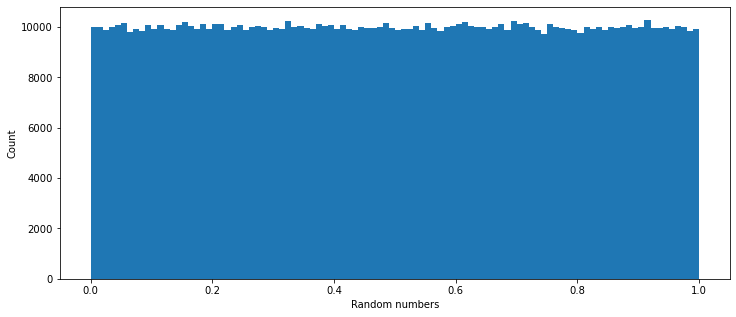

In [94]:
# Generate a lot of numbers, and plot histogram
def lehmer(X0, N):
    # Parameters of the generator
    a = 48271
    m = 2**31 - 1 # a large Mersenne prime
    
    X = np.zeros(N)
    X[0] = X0
    for i in range(1, N):
        X[i] = (X[i-1]*a) % m
    return X / m


random_numbers = lehmer(42, 1000000)

fig = plt.figure(figsize = (12, 5))
plt.hist(random_numbers, bins = 100)
plt.xlabel('Random numbers')
plt.ylabel('Count')

## /dev/random

On linux or Mac, there is a file-like object in the file system, at ``/dev/random`` which uses a combination of a PRNG with actual random numbers (collected from voltage or temperature fluctuations measured in the computer hardware) to set and reset the seed.

In [73]:
# open a file-object to read from /dev/random, opened in 'read bytes' mode
f = open('/dev/random', 'rb')

# Read 4 bytes
b = f.read(4)
# Map the 4 bytes to a positive integer,
# and divide by 2**32 (which is the largest 4 byte integer)
# to get a number between 0 and 1
struct.unpack('I', b)[0] / 2**32

0.23191352281719446

# Generating random numbers in practice

* For most physics applications, the built-in generators in common languages are plenty good enough
* If you have very special needs (for example a very fast generator) you might want to read up on different options
* If you need reproducible results, for debugging etc., pseudorandom is better than true random (just remember to make note of the seed).
* If you need cryptographic security, true random is better than pseudorandom
* Most importantly: Avoid inventing or implementing your own generator (unless that is your field of research). It is unlikely that you can improve upon the speed and properties of existing implementations.

## Random numbers in plain python

In [17]:
from random import random, randint
print(random()) # One random number between 0 and 1
print(randint(1, 6)) # one random integer between 1 and 6 (inclusive)

0.8606932018749139
2


## Random numbers in numpy

In [18]:
# An array of N random numbers between 0 and 1
N = 10
np.random.random(N)

array([ 0.64088008,  0.05171103,  0.42593667,  0.7040411 ,  0.39534918,
        0.40885125,  0.05856888,  0.05749582,  0.37707926,  0.37655529])

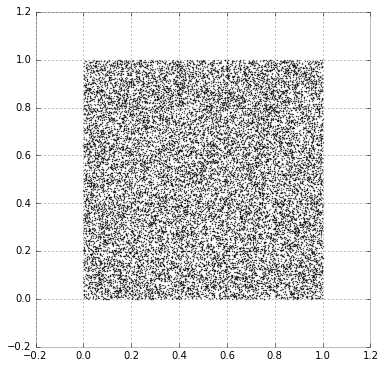

In [28]:
N = 20000
fig = plt.figure(figsize = (6,6))
# s sets markersize, alpha sets transparency
X = np.random.random(size = N)
Y = np.random.random(size = N)
plt.scatter(X, Y, marker = 'o', s = 1, alpha = 0.5, color = 'k')

## Gaussian random numbers from numpy

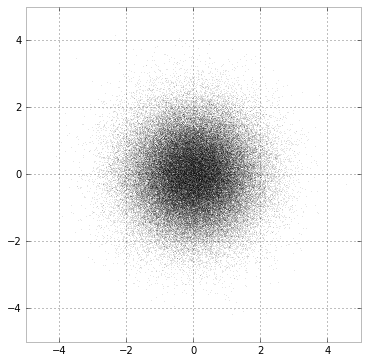

In [30]:
N = 100000
# Set figure size and limits
fig = plt.figure(figsize = (6,6))
plt.xlim((-5, 5))
plt.ylim((-5, 5))
# s sets markersize, alpha sets transparency
X = np.random.normal(size = N)
Y = np.random.normal(size = N)
plt.scatter(X, Y, marker = '.', s = 1, alpha = 0.1, color = 'k')

## Other distributions, from numpy and scipy

Text(0.5, 1.0, 'Left-skewed Gumbel')

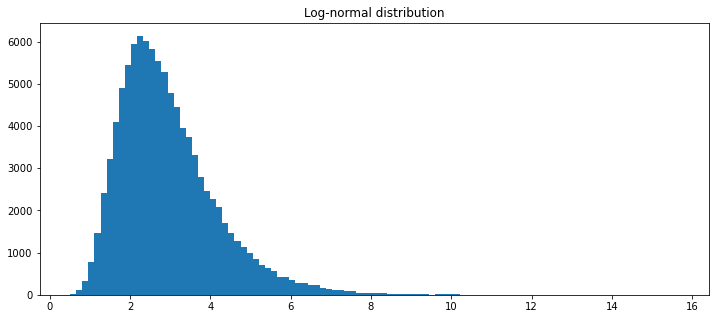

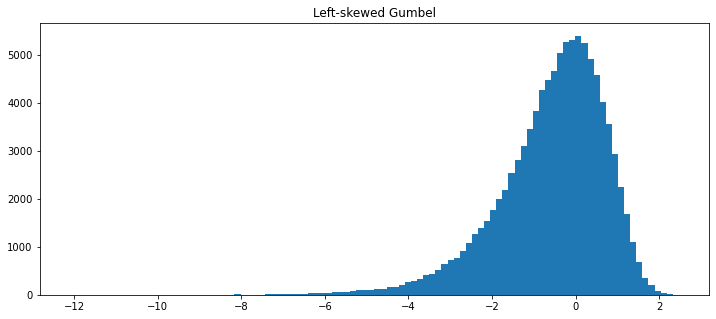

In [32]:
# numpy contains a number of different distributions
# http://docs.scipy.org/doc/numpy/reference/routines.random.html
N = 100000
nbins = 100
# Plot a histogram to visualise shape of distribution
fig = plt.figure(figsize = (12, 5))
random_numbers = np.random.lognormal(size = N, mean = 1, sigma = 0.4)
counts, bins, fig = plt.hist(random_numbers, bins = nbins)
plt.title('Log-normal distribution')

# Scipy contains an even greater number of different distributions
# https://docs.scipy.org/doc/scipy/reference/stats.html

# Here showing the left-skewed Gumbel
from scipy.stats import gumbel_l
N = 100000
nbins = 100
# Plot a histogram to visualise shape of distribution
fig = plt.figure(figsize = (12, 5))
random_numbers = gumbel_l(loc = 0, scale = 1).rvs(N)
counts, bins, fig = plt.hist(random_numbers, bins = nbins)
plt.title('Left-skewed Gumbel')


## Transformation of Random numbers

Sometimes you need to transform random numbers from one distribution to another.
* Some languages (e.g. Fortran) do not have built-in generators for anything other than uniform random numbers
* Sometimes, you might need a non-standard distribution that is not supported in numpy or scipy

## Trivial transformation: Uniform to uniform

The most common transformation is from one uniform distribution to another. Just multiply and add an offset as needed, to map from $[0, 1)$ to whatever interval you want.

In [87]:
# Transforming from [0, 1) to [-1, 1)
print( 2*np.random.random(10) - 1 )

# This feature is of course also built in
print( np.random.uniform(-1, 1, 10))

[-0.79511651  0.37700825  0.45051508  0.32299583 -0.68095775 -0.33766382
 -0.54811888  0.54010076  0.14740129  0.16040608]
[-0.0916598   0.08085365  0.76108763  0.01875114 -0.1999392  -0.65691269
 -0.34410149 -0.96529688 -0.4254648   0.66904524]


## Uniform to Gaussian - the Box-Muller transform

Maps from two random numbers on the interval from 0 to 1, to two independent Gaussian-distributed random numbers with mean 0 and standard deviation 1.

Handy if you need Gaussian random numbers in Fortran, for example. In python, just use ``np.random.normal``.

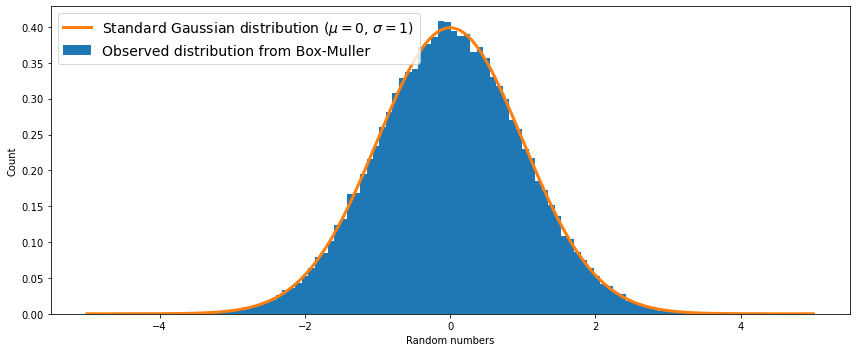

In [106]:
def boxmuller():
    # Returns two gaussian random numbers
    # First, draw to uniform random numbers, u and v, from 0 to 1,
    # and check that (u+v) > 0 and (u**2 + v**2) < 1
    u, v = np.random.uniform(-1, 1, 2)
    while ((u+v) == 0) or ((u**2 + v**2) > 1):
        # Redraw as many times as necessary
        u, v = np.random.uniform(-1, 1, 2)
    s = u**2 + v**2
    x = u*np.sqrt(-2*np.log(s)/s)
    y = v*np.sqrt(-2*np.log(s)/s)
    return x, y


# Generate a lot of numbers, and plot histogram
N = 100000
random_numbers = np.zeros(N)
for i in range(0, N, 2):
    random_numbers[i:i+2] = boxmuller()

fig = plt.figure(figsize = (12, 5))
# Plot histogram
plt.hist(random_numbers, bins = 100, density = True, label = 'Observed distribution from Box-Muller')
# Draw expected distribution, for comparison
x = np.linspace(-5, 5, 1001)
plt.plot(x, np.exp(-x**2 / 2) / (np.sqrt(2*np.pi)), lw = 3, label = 'Standard Gaussian distribution ($\mu=0$, $\sigma=1$)')

plt.legend(fontsize = 14)
plt.xlabel('Random numbers')
plt.ylabel('Count')
plt.tight_layout()

## Mapping to non-standard distributions via the inverse of the CDF

For a probability distribution, the probability density function (PDF), $p(x)$, gives the probability $p(x) dx$ of drawing a number in the infinitesimal interval $[x, x + dx)$.

The cumulative distribution function (CDF), gives the probability $c(x)$ of drawing a number $x'$ such that $x' < x$. The CDF is given by the integral of the PDF.

$$ c(x) = \int_{X_{min}}^x p(x') dx' $$

where $X_{min}$ is the smallest possible number (which may be $-\infty$, for example for the Gaussian distribution).


### A non-standard distribution

Let's say you want numbers from the distribution with PDF given by

$$ p(x) = \frac{3}{2} x^2, \;\;\; x \in [-1, 1]. $$

First, we find the CDF:

$$ c(x) = \frac{3}{2} \int_{-1}^x x'^2 dx' = \frac{1}{2} (x^3 + 1)  $$

Then, we find the inverse of the CDF:

$$ x = \big( 2c(x) - 1 \big)^{1/3} $$

Just as the CDF maps from a "random number" on the interval $[-1, 1]$ to a probability on the interval $[0, 1]$, we can use the inverse of the CDF to map in the opposite direction.

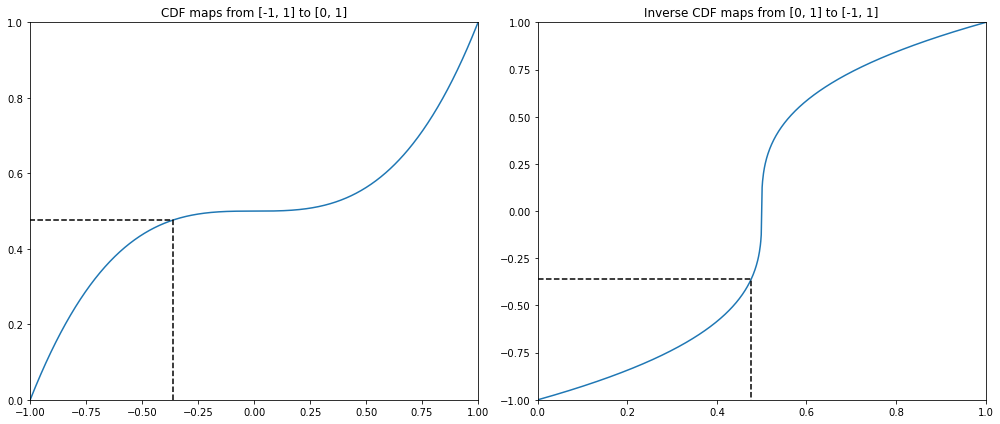

In [143]:
def PDF(x):
    return 3*x**2 / 2

def CDF(x):
    return (x**3 + 1) / 2

def iCDF(c):
    # Built-in function for the cube root
    # Gives real result when the input is real
    return np.cbrt(2*c - 1)

# Some plots to explain what's going on
fig, ax = plt.subplots(ncols = 2, figsize = (14, 6))

# The CDF maps from a random number (on the interval -1 to 1 in this case)
# to a probability (which is always a number on the interval [0, 1]).
u = np.linspace(-1, 1, 1001)
ax[0].plot(u, CDF(u))

# Illustrate the mapping
x = np.random.uniform(-1, 1)
ax[0].plot([x, x, -1], [0, CDF(x), CDF(x)], '--', c = 'k')
ax[0].set_xlim(-1, 1)
ax[0].set_ylim(0, 1 )
ax[0].set_title('CDF maps from [-1, 1] to [0, 1]')


# The inverse CDF maps from a probability on the interval from 0 to 1,
# to a random number (on the interval -1 to 1 in this case).
u = np.linspace(0, 1, 1001)
ax[1].plot(u, iCDF(u))
# Illustrate the inverse mapping
ax[1].plot([0, CDF(x), CDF(x)], [x, x, -1], '--', c = 'k')
ax[1].set_xlim(0, 1 )
ax[1].set_ylim(-1, 1)
ax[1].set_title('Inverse CDF maps from [0, 1] to [-1, 1]')
plt.tight_layout()

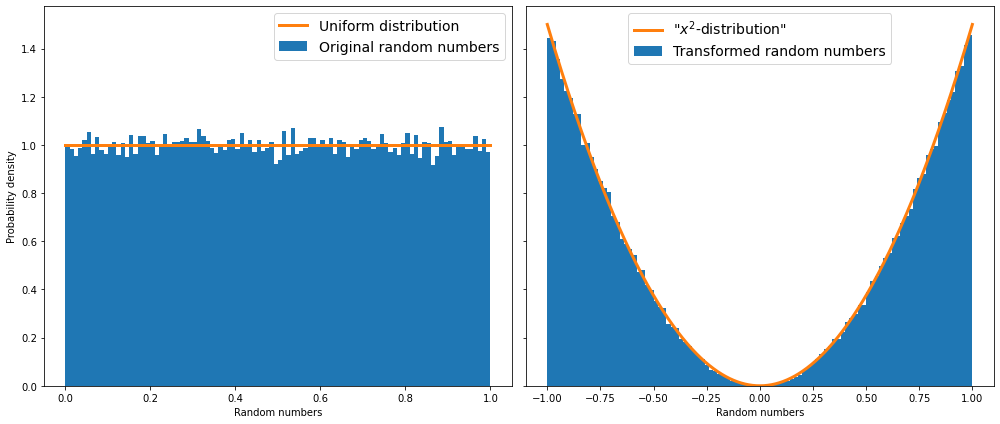

In [146]:
# Illustrate the transformation
fig, ax = plt.subplots(ncols = 2, figsize = (14, 6), sharey = True)

# Draw a large number of random numbers on the interval [0, 1)
N = 100000
X = np.random.random(N)
# Transform to the desired distribution
random_numbers = iCDF(X)

# Plot original distribution
ax[0].hist(X, bins = 100, density = True, label = 'Original random numbers')
ax[0].plot([0, 1], [1, 1], lw = 3, label = 'Uniform distribution')
ax[0].set_xlabel('Random numbers')
ax[0].set_ylabel('Probability density')
ax[0].legend(fontsize = 14)

# Plot transformed distribution
ax[1].hist(random_numbers, bins = 100, density = True, label = 'Transformed random numbers')
tmp = np.linspace(-1, 1, 1001)
ax[1].plot(tmp, PDF(tmp), lw = 3, label = '"$x^2$-distribution"')
ax[1].set_xlabel('Random numbers')
ax[1].legend(fontsize = 14)

plt.tight_layout()

## Mapping to non-standard distributions via rejection sampling

Can be used to map to any PDF, $p(x)$, as long as $p$ is known.

We need:
* We must be able to evaluate $p(x)$.
* $p(x)$ must be a PDF: it must satisfy
 * $\int_{X_{min}}^{X_{max}} p(x) dx = 1$
 * $p(x) \geq 0 \; \forall \; x \in [X_{min}, X_{max}]$)
* We must have a "test function" $f(x)$, such that $f(x) \geq p(x) \; \forall \; x \in [X_{min}, X_{max}]$.
* The cumulative $F(x) = \int_{X_{min}}^x f(x') dx'$, must exist, and be invertible (and ideally the inverse, $F^{-1}(x)$, should be given by a simple analytical expression).

The algorithm:
* Draw a random number, $\xi_1$, from the uniform distribution on the interval $[0, F(X_{max})]$, and map it to the interval $[X_{min}, X_{max}]$ via the inverse of $f$, such that $x = F^{-1}(\xi_1)$.
* Draw a second random number, $\xi_2$ from the uniform distribution on the interval $[0, f(x)]$.
* If $\xi_2 \leq p(x)$, then $x$ is accepted.
* If $\xi_2 > p(x)$, then $x$ is rejected, and we start again.

Note that the simplest possible test function is a constant such that $f(x) = \max(p(x))$ for $x \in [X_{min}, X_{max}]$. Choosing a test function that fits the desired pdf better will result in more efficient sampling (fewer rejections), but it will not otherwise improve the quality of the results.

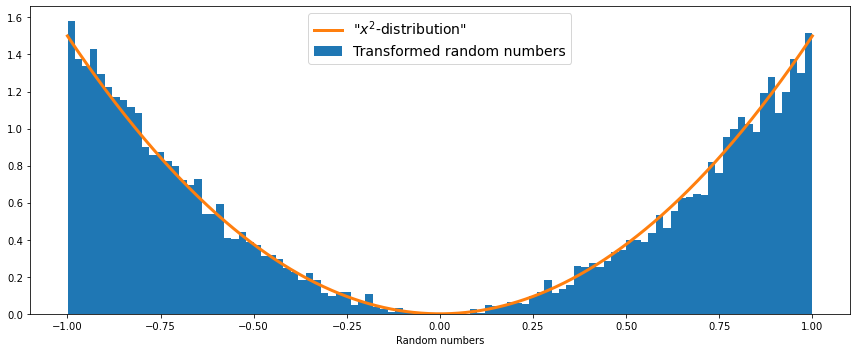

In [171]:
# Illustration using the same pdf as in the example above

Xmin = -1
Xmax =  1

def p(x):
    return 3*x**2 / 2

# The trivial test function, constant equal to max(p(x))
def f(x):
    return 3/2

# The cumulative of the test function
def F(x):
    return 3/2 + 3/2*x

def invF(x):
    return 2*(x-3/2)/3
    
    
# Draw a large number of random numbers
N = 10000
random_numbers = np.zeros(N)
i = 0
while i < N:
    xi1 = F(Xmax)*np.random.random()
    x = invF(xi1)
    xi2 = f(x)*np.random.random()
    if xi2 <= p(x):
        # Number is accepted, store it and move on to next iteration
        random_numbers[i] = x
        i += 1
    else:
        # Number is rejected, start again by drawing new xi1 and xi2
        pass
    
    

# Plot transformed distribution
fig = plt.figure(figsize = (12, 5))
plt.hist(random_numbers, bins = 100, density = True, label = 'Transformed random numbers')
tmp = np.linspace(-1, 1, 1001)
plt.plot(tmp, PDF(tmp), lw = 3, label = '"$x^2$-distribution"')
plt.xlabel('Random numbers')
plt.legend(fontsize = 14)

plt.tight_layout()

## A bad example: RANDU

In [172]:
# RANDU is a historical example of a bad pseudorandom number generator
# See for example https://en.wikipedia.org/wiki/RANDU
def RANDU(r):
    return 65539*r % 2**31

In [173]:
# Initial value (seed), should be an odd number
r = 1
# Number of points
N = 10000

# To demonstrate the problem with RANDU, we will
# generate N triplets of numbers, and plot them as
# points in a 3D plot.

# Array to hold the coordinates of the points (x, y, z)
rand = np.zeros(3*N)
for i in range(3*N):
    # Use previous value of r to calculate new value
    r = RANDU(r)
    # scale to get numbers between 0 and 1
    rand[i] = r / 2**31

# Reshape array into triplets of _consecutive_ numbers
# for plotting as 3D point cloud
rand = rand.reshape((N,3))

<IPython.core.display.Javascript object>


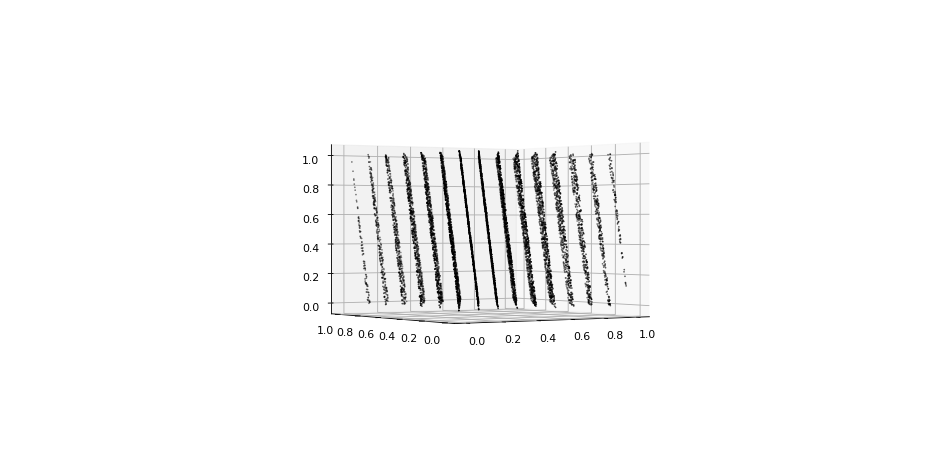

In [176]:
# Set up 3D plot
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (12, 6))

ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(rand[:,0], rand[:,1], rand[:,2], s = 1, marker = '.', color = 'k')


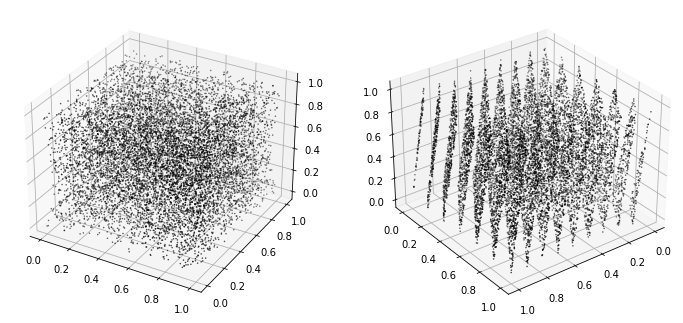

In [178]:
# Set up 3D plot
%matplotlib inline
fig = plt.figure(figsize = (12, 6))

# Two different subfigures, to see data from two different orientations
# syntax of add_subplot is add_subplot(ijk), where
# i is number of rows, j number of columns, and k is the id of this plot
# counting from top left
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(rand[:,0], rand[:,1], rand[:,2], s = 1, marker = '.', color = 'k')
ax2.scatter(rand[:,0], rand[:,1], rand[:,2], s = 1, marker = '.', color = 'k')
# Change orientation of second plot to reveal planes
ax2.azim = 53